In [1]:
import pandas as pd
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
import xarray as xr

In [15]:
file='/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/disaggregation/surfdata_CAMELS_level1_hist_78pfts_CMIP6_simyr2000_HAND_trapezoidal_0.nc'
dssf = xr.open_dataset(file)
dssf.LONGXY.values-360, dssf.LATIXY.values, 

(array([-68.57628436]), array([47.00585121]))

In [11]:
file='/glade/derecho/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Calib_HH_emulator/level1_0/level1_0/run/level1_0.mosart.h1.2008-11-01-00000.nc'
ds=xr.open_dataset(file)

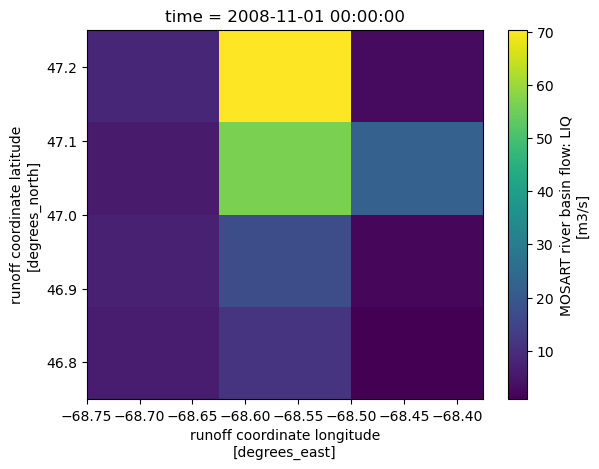

In [20]:
ds.RIVER_DISCHARGE_OVER_LAND_LIQ.isel(time=0).sel(lat=slice(46.8, 47.2), lon=slice(-68.7, -68.4)).plot()

In [9]:
d = ds.RIVER_DISCHARGE_OVER_LAND_LIQ.isel(time=0).values
d[d>0]

array([ 41.41714366,  32.32432465,  26.54854193,  57.37555659,
        39.50384494,   8.43514388,  79.87355298,  80.95824232,
       102.28057883,  86.87878895])

In [21]:
ds.RIVER_DISCHARGE_OVER_LAND_LIQ

<xarray.DataArray 'RIVER_DISCHARGE_OVER_LAND_LIQ' (time: 30, lat: 224, lon: 464)>
[3118080 values with dtype=float64]
Coordinates:
  * time     (time) object 2008-11-01 00:00:00 ... 2008-11-30 00:00:00
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
Attributes:
    long_name:     MOSART river basin flow: LIQ
    units:         m3/s
    cell_methods:  time: mean

In [30]:
# Assuming ds is your xarray dataset
mean_values = ds.RIVER_DISCHARGE_OVER_LAND_LIQ.mean(dim='time')
max_index = mean_values.argmax(dim=('lat', 'lon'))  # This returns a tuple of indices
m1 = max_index['lat']
m2 = max_index['lon']
ds_max = ds.RIVER_DISCHARGE_OVER_LAND_LIQ.isel(lat=m1, lon=m2)


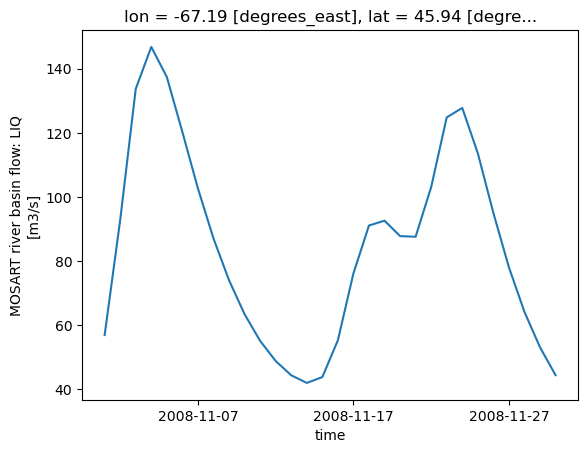

In [33]:
ds_max.plot()

In [34]:
# Calculate mean values over the time dimension
mean_values = ds.RIVER_DISCHARGE_OVER_LAND_LIQ.mean(dim='time')

# Find all grids with mean values greater than 0
positive_indices = mean_values.where(mean_values > 0).stack(grid=('lat', 'lon')).dropna('grid')

# Initialize a list to hold time series for each grid
time_series_dict = {}

# Loop through each grid with positive mean values
for grid_index in positive_indices.grid.values:
    lat_index, lon_index = grid_index
    # Extract the time series for the current grid
    time_series = ds.RIVER_DISCHARGE_OVER_LAND_LIQ.sel(lat=lat_index, lon=lon_index)
    time_series_dict[(lat_index, lon_index)] = time_series


In [40]:
file='/glade/derecho/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Calib_HH_emulator/level1_0/level1_0/run/level1_0.clm.h1.'
dsclm=xr.open_dataset(file)

FileNotFoundError: [Errno 2] No such file or directory: '/glade/derecho/scratch/guoqiang/CTSM_outputs/CAMELS_Calib/Calib_HH_emulator/level1_0/level1_0/run/level1_0.clm.h1.2008-11-01-00000.nc'